In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
from dynadojo.systems.gym_classic_control import GymClassicControlSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.utils.lds import plot
from dynadojo.baselines.lr import LinearRegression
from dynadojo.challenges import FixedComplexity

In [151]:
GymClassicControlSystem.all_envs

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1']

In [200]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = SystemChecker(GymClassicControlSystem(latent_dim, embed_dim, "Pendulum-v1", seed=1912))

x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)

x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)

(50, 1, 3)
(30, 1, 3)


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

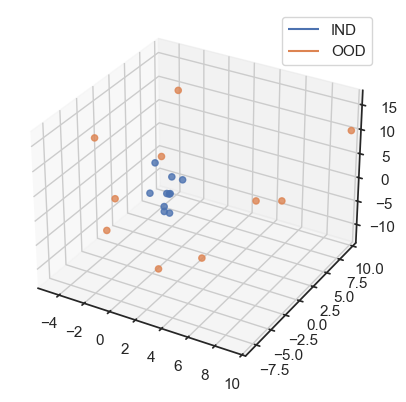

In [201]:
import numpy as np

x0_3d = np.expand_dims(x0, axis=1)
y0_3d = np.expand_dims(y0, axis=1)

print(x0_3d.shape)
print(y0_3d.shape)

plot([x0_3d, y0_3d], target_dim=3, labels=["IND", "OOD"], max_lines=test_size)

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

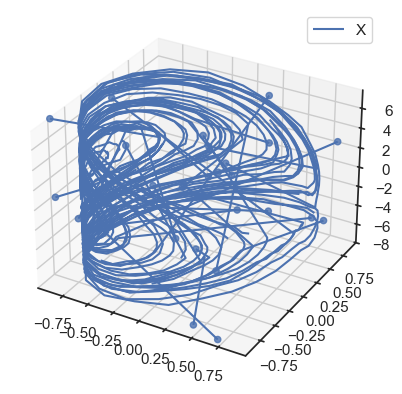

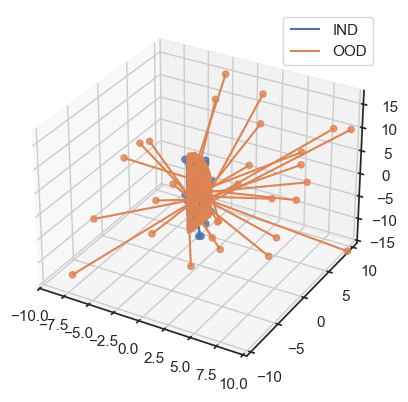

In [202]:
plot([x], target_dim=3, labels=["X"])

plot([x, y], target_dim=3, labels=["IND", "OOD"])

In [203]:
# check that x0 matches the first timestep of x
is_same = np.allclose(x0, x[:, 0, :])
print("\nDo the initial conditions match?:", is_same)



Do the initial conditions match?: True


y_err=70.29044367883374


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

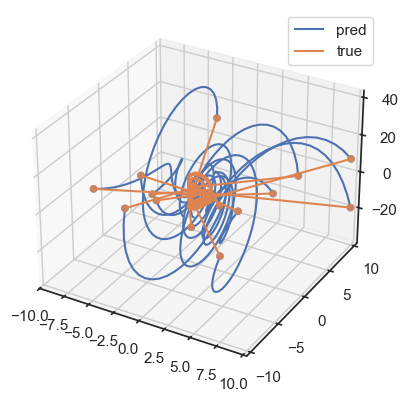

In [204]:
lr = AlgorithmChecker(LinearRegression(embed_dim, timesteps, max_control_cost=0, seed=100))
lr.fit(x)
y_pred = lr.predict(y[:, 0], timesteps)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
plot([y_pred, y], target_dim=3, labels=["pred", "true"], max_lines=15)

In [205]:
challenge = FixedComplexity(
    N=[10, 50, 100, 500],
    l=3,
    e=3,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=GymClassicControlSystem,
    trials=10,
    test_examples=50,
    test_timesteps=50,
    system_kwargs={"env_name": "Pendulum-v1"},
)
data = challenge.evaluate(LinearRegression, id="linear regression")

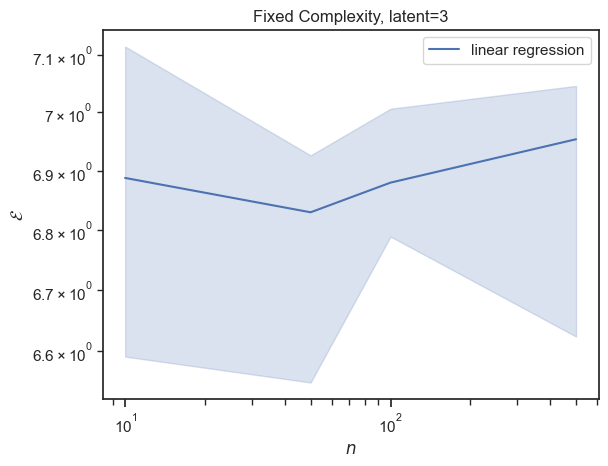

<Axes: title={'center': 'Fixed Complexity, latent=3'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [206]:
challenge.plot(data)